In [43]:
%matplotlib inline

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
sns.set() # matplot lib defaults
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format='retina'

In [46]:
# find the notebook the saved figures came from
fig_prefix='../figures/jq-'

In [47]:
from IPython.display import FileLink
FileLink('./data_cleanup.ipynb')

/Users/jing/Documents/LambdaSchool/lab/notebooks/data_cleanup.ipynb

In [48]:
df = pd.read_sql_table('data', 'sqlite:///../data/mydb.db')  

In [49]:
df.head(3)

,id,market,product,country,date,retail,wholesale,currency,year,month,day
0,0,Bujumbura,Maize,Burundi,2011-10-04,0.0,548798.0,BIF,2011.0,10.0,4.0
1,1,Bujumbura,Maize,Burundi,2011-10-05,0.0,549000.0,BIF,2011.0,10.0,5.0
2,2,Bujumbura,Maize,Burundi,2011-10-06,0.0,498970.0,BIF,2011.0,10.0,6.0


In [50]:
date_selected = (df['date']>'2012-01-01' )
Market = 'Bujumbura'
market_selected = (df['market']==Market)
product_selected = ( df['product']=='Maize')

condition = date_selected & market_selected & product_selected
df = df[condition]
df.head()

,id,market,product,country,date,retail,wholesale,currency,year,month,day
54,54,Bujumbura,Maize,Burundi,2012-01-02,0.0,599770.0,BIF,2012.0,1.0,2.0
55,55,Bujumbura,Maize,Burundi,2012-01-03,0.0,606940.0,BIF,2012.0,1.0,3.0
56,56,Bujumbura,Maize,Burundi,2012-01-04,0.0,595704.0,BIF,2012.0,1.0,4.0
57,57,Bujumbura,Maize,Burundi,2012-01-05,0.0,590935.0,BIF,2012.0,1.0,5.0
58,58,Bujumbura,Maize,Burundi,2012-01-06,0.0,593474.0,BIF,2012.0,1.0,6.0


In [51]:
df['currency'].unique()

array(['BIF'], dtype=object)

visualization reveals different trends for different market, let's narrow down

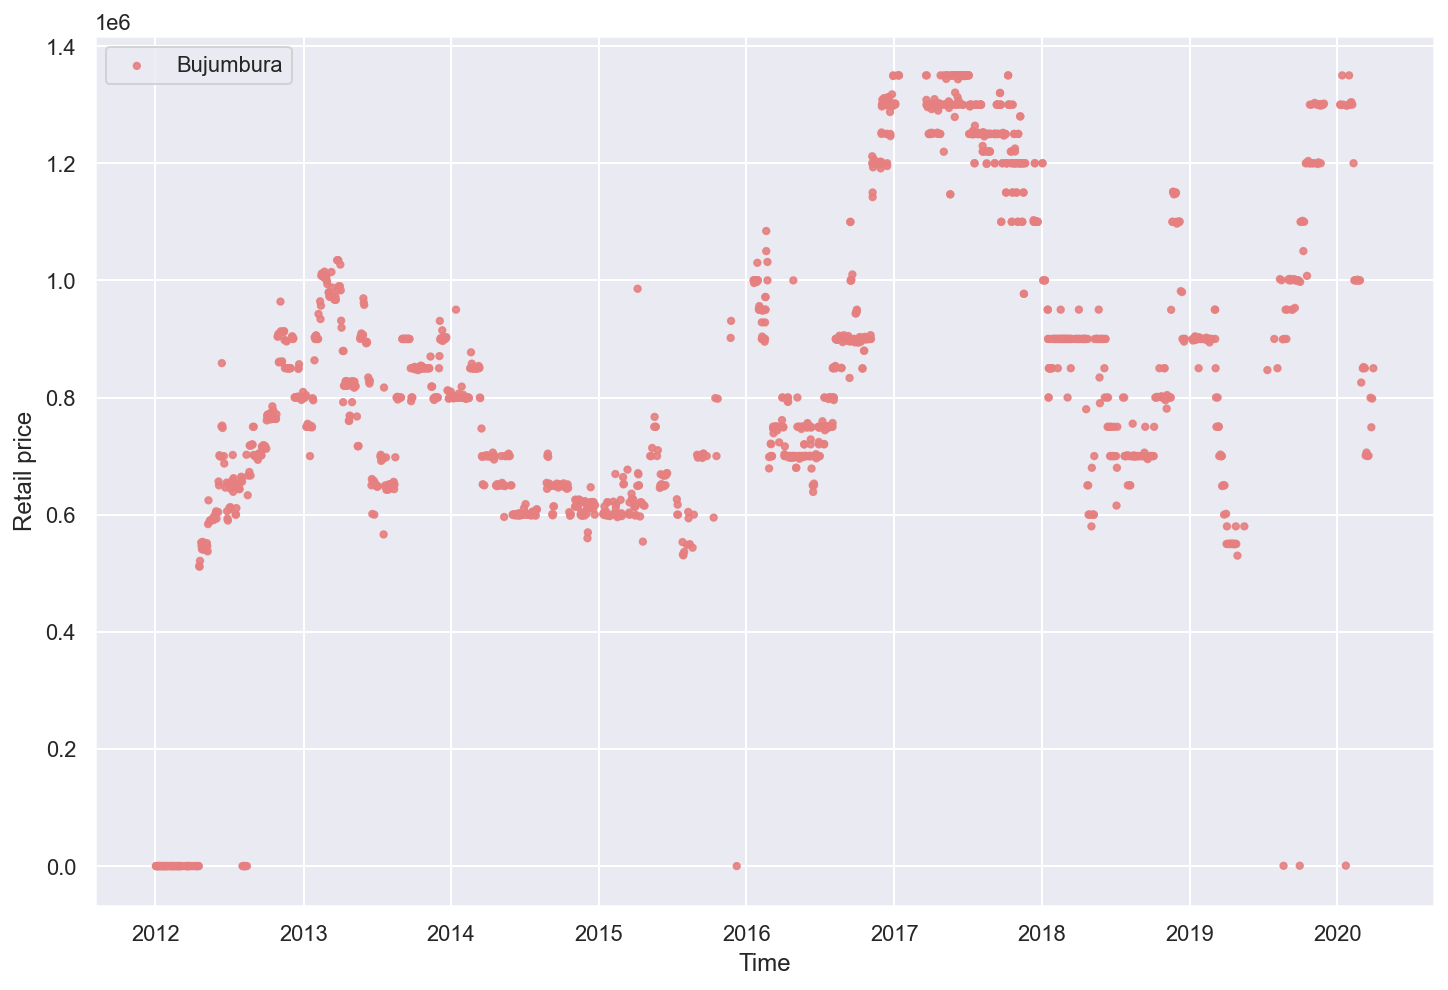

In [52]:
#market = 'Busia'#'Gitega'#, 'Bujumbura', 'Arusha']#,'Busia',  'Dar es salaam', 'Iringa']
color = [0.9, 0.5, 0.5]
color_repeated =np.tile(np.array(color), (df.shape[0],1))
#print(color_repeated)

fig = plt.figure()
ax = fig.gca()
ax.scatter(df['date'],
           df['retail'],
           c = color_repeated, 
           s=10, 
           label=Market,
           alpha=0.9)
plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

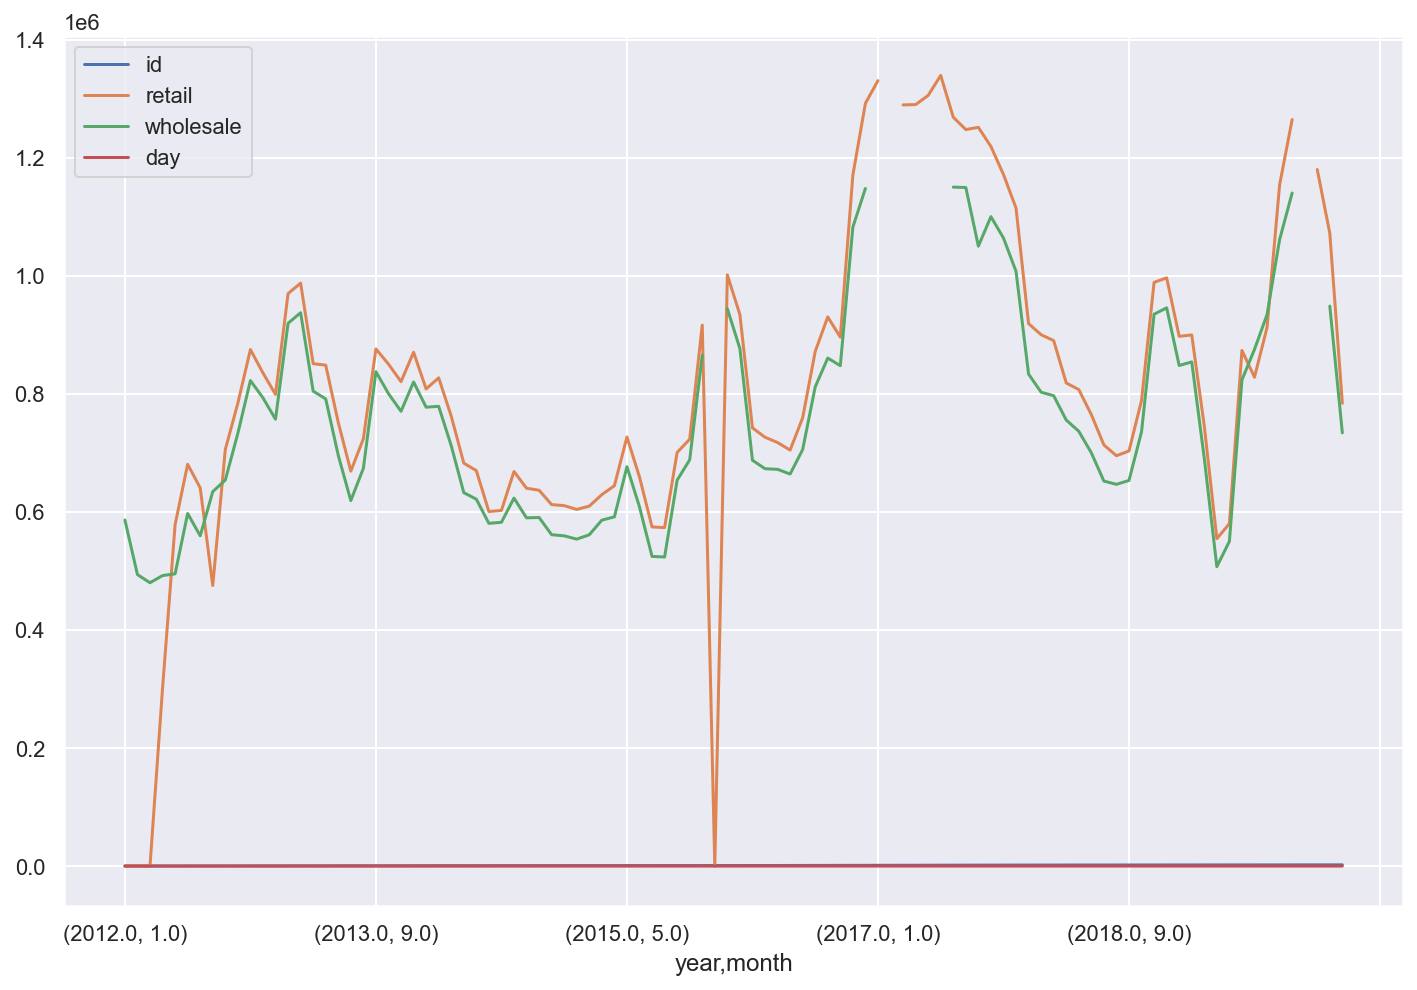

In [54]:
# maize price average over all markets 
df.sort_values('date').groupby(['year','month']).mean().plot()
plt.show()